In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2)
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 데이터 확인

## 데이터 Load

In [3]:
from pathlib import Path
path = Path.cwd() / 'data/titanic'

In [4]:
df_train = pd.read_csv(path / 'train.csv')
df_test = pd.read_csv(path / 'test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Null data
- Cabin : train, test 모두 80%
- Age : train, test 모두 20%
- Embarked : train 2개
- Fare : test 1개

In [7]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
df_test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

Text(0.5, 1.0, 'Total Missing Value (%)')

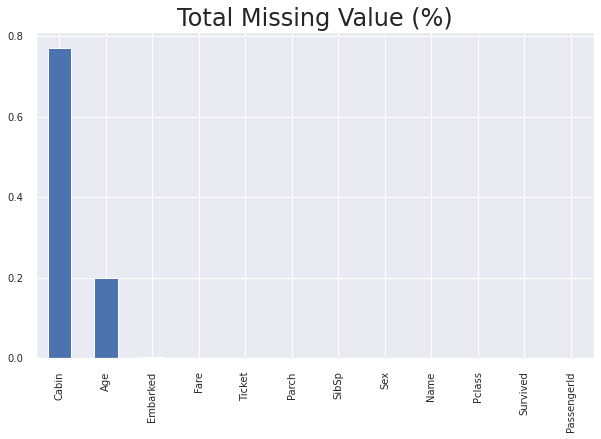

In [58]:
percent = df_train.isnull().sum().sort_values(ascending=False)/len(df_train)
percent.plot(kind="bar", figsize = (10,6), fontsize = 10)
plt.title("Total Missing Value (%)")

Text(0.5, 1.0, 'Total Missing Value (%)')

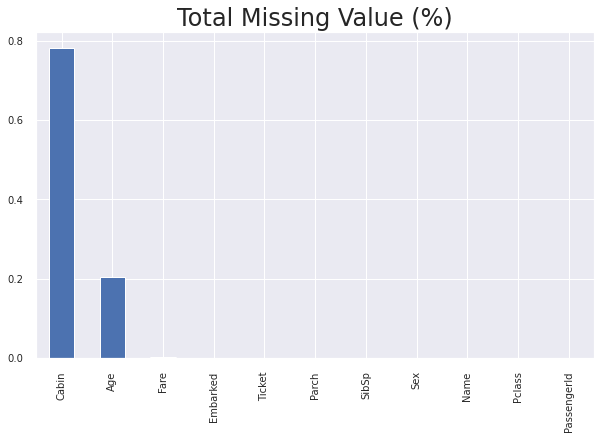

In [59]:
percent = df_test.isnull().sum().sort_values(ascending=False)/len(df_test)
percent.plot(kind="bar", figsize = (10,6), fontsize = 10)
plt.title("Total Missing Value (%)")

## Target Label 확인
- 0 : die, 1 : Survive
- 타겟 데이터의 분포가 balanced

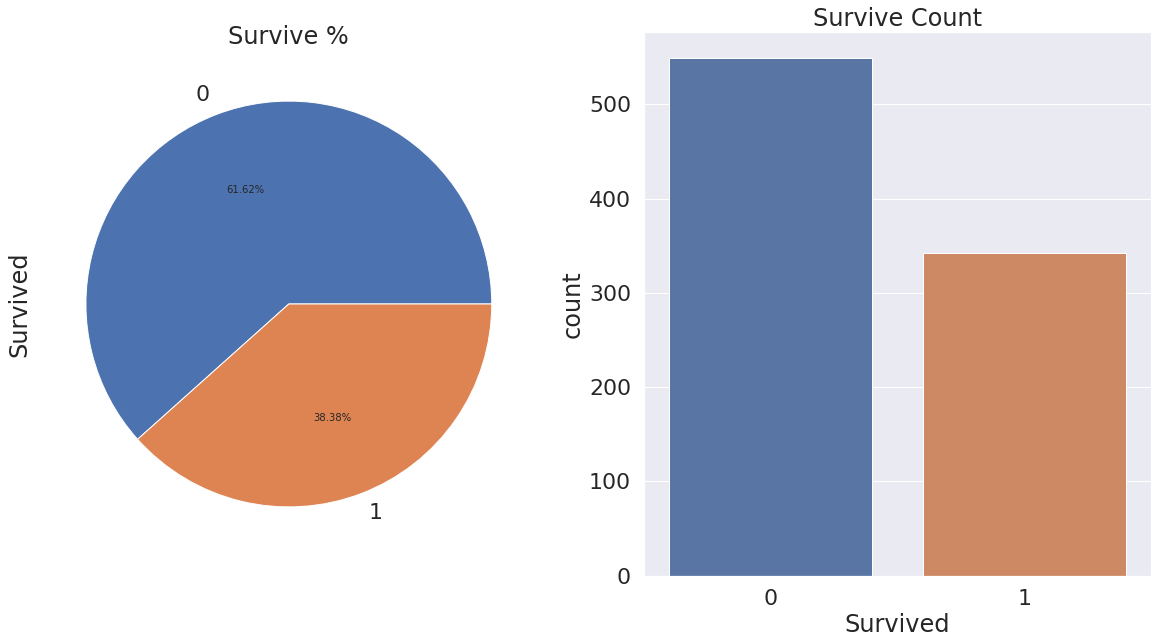

In [60]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

vc_df = df_train['Survived'].value_counts()
vc_df.plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survive %')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Survive Count')

plt.show()

# 데이터 분석

## Pclass
- 클래스가 높을수록 생존률이 높음
    - 1st : 63%
    - 2st : 47%
    - 3st : 24%

In [64]:
# Pclass별 승객
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [65]:
# Pclass별 생존
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [69]:
pd.pivot_table(df_train[['Pclass', 'Survived']], index = ['Pclass'], aggfunc = ['count','sum'])

,count,sum
,Survived,Survived
Pclass,,
1,216,136
2,184,87
3,491,119


In [82]:
# index, columns
# margins = 합계 추가 여부(boolen)
df = pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)
df

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [83]:
df['survived%'] = df.apply(lambda x : x[1] / x['All'], axis = 1)
df

Survived,0,1,All,survived%
Pclass,,,,
1,80,136,216,0.629630
2,97,87,184,0.472826
3,372,119,491,0.242363
All,549,342,891,0.383838


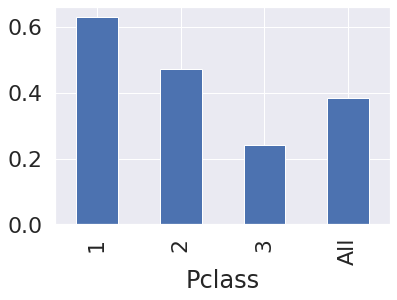

In [84]:
df['survived%'].plot.bar()

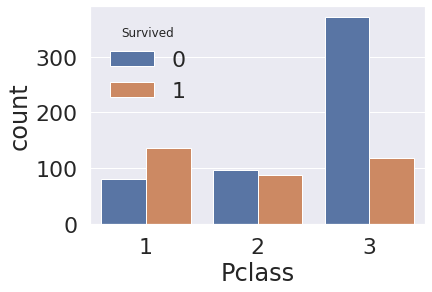

In [85]:
sns.countplot('Pclass', hue='Survived', data=df_train)
plt.show()

## Sex
- 여성의 생존률이 높음
    - male : 19%
    - female : 74%

In [86]:
df = pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)
df['survived%'] = df.apply(lambda x : x[1] / x['All'], axis = 1)
df

Survived,0,1,All,survived%
Sex,,,,
female,81,233,314,0.742038
male,468,109,577,0.188908
All,549,342,891,0.383838


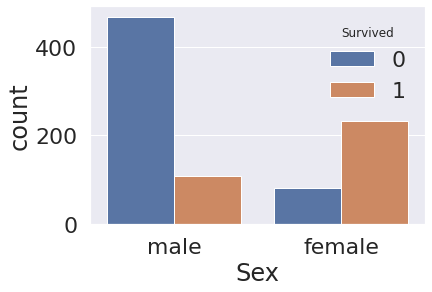

In [87]:
sns.countplot('Sex', hue='Survived', data=df_train)
plt.show()